In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [36]:
df = pd.read_csv('P1.csv')

df.shape

(3000, 16)

In [37]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2.0,2,2.0,2,2.0,2,1,NO
1,F,55,1,2,2,1,1,2,2.0,2,1.0,1,1.0,2,2,NO
2,F,78,2,2,1,1,1,2,1.0,2,1.0,1,2.0,1,1,YES
3,M,60,2,1,1,1,2,1,2.0,1,1.0,2,1.0,2,2,YES
4,F,80,1,1,2,1,1,2,1.0,2,1.0,1,1.0,1,2,NO


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 3000 non-null   object 
 1   AGE                    3000 non-null   int64  
 2   SMOKING                2997 non-null   object 
 3   YELLOW_FINGERS         3000 non-null   int64  
 4   ANXIETY                3000 non-null   int64  
 5   PEER_PRESSURE          3000 non-null   int64  
 6   CHRONIC_DISEASE        3000 non-null   int64  
 7   FATIGUE                3000 non-null   int64  
 8   ALLERGY                2998 non-null   float64
 9   WHEEZING               3000 non-null   int64  
 10  ALCOHOL_CONSUMING      2998 non-null   float64
 11  COUGHING               3000 non-null   int64  
 12  SHORTNESS_OF_BREATH    2998 non-null   float64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64  
 14  CHEST_PAIN             3000 non-null   int64  
 15  LUNG

In [39]:
df.describe()


,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2998.000000,3000.000000,2998.000000,3000.000000,2998.000000,3000.000000,3000.000000
mean,55.169000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506671,1.497333,1.491328,1.510667,1.488326,1.489667,1.498667
std,14.723746,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499947,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


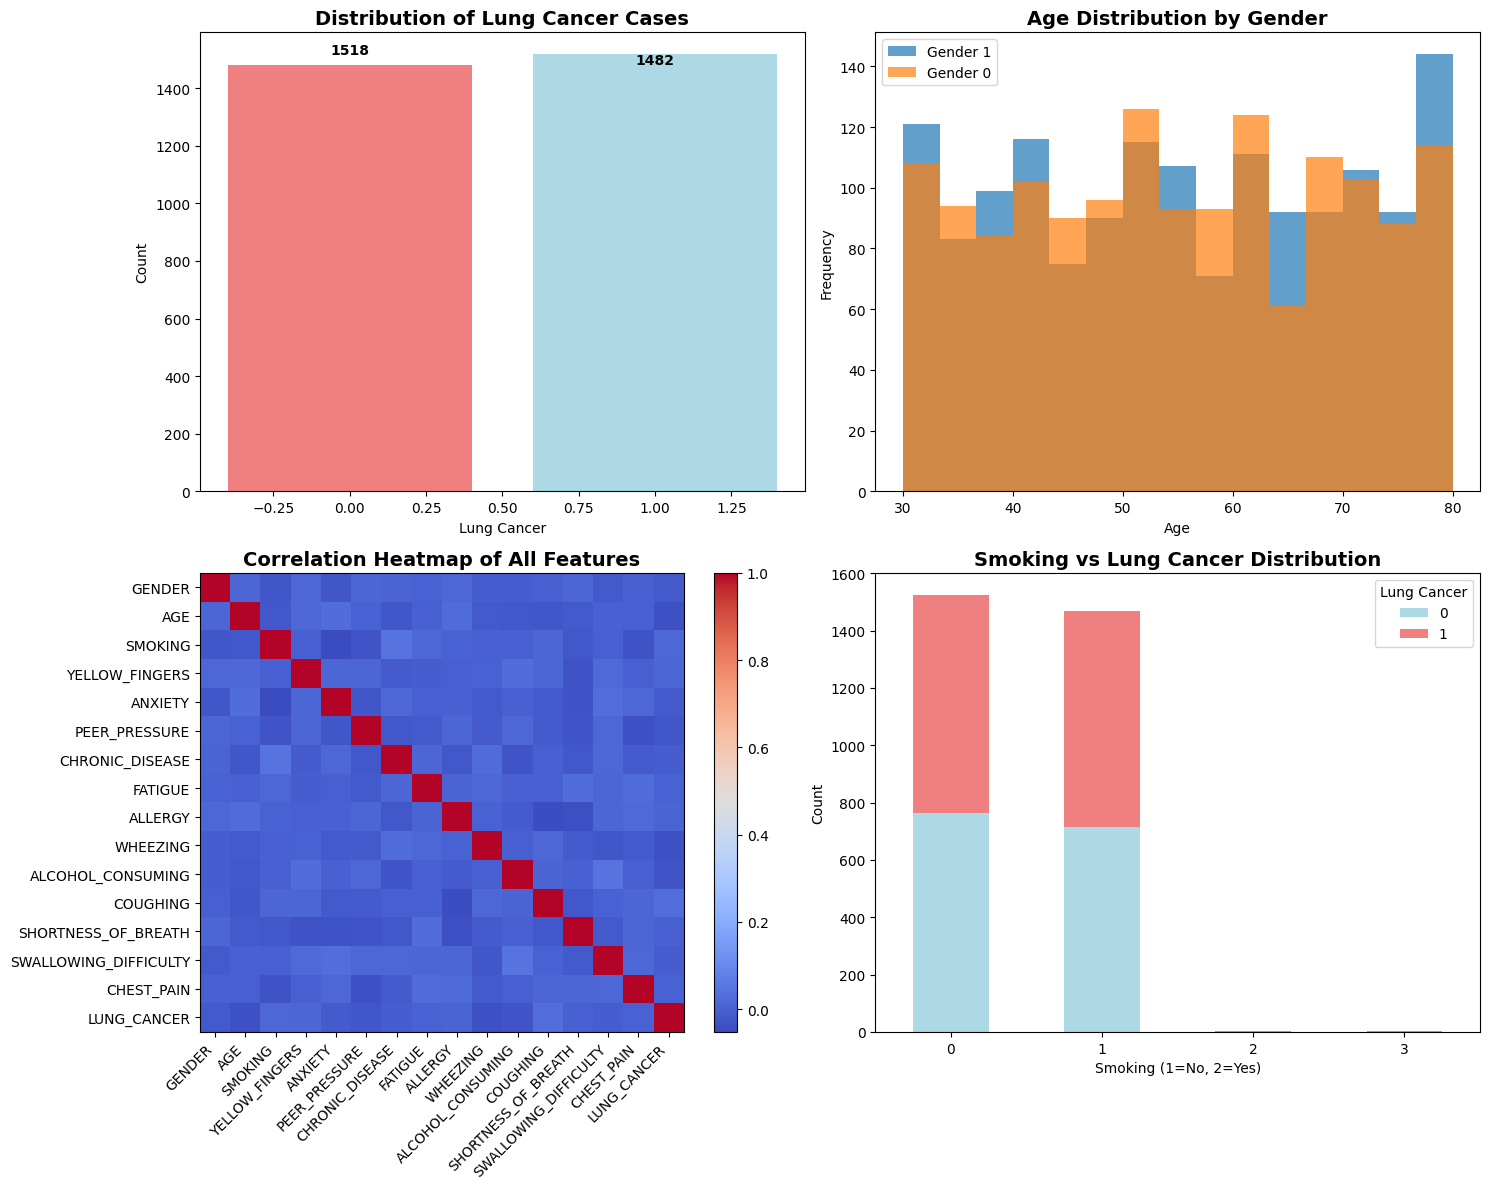

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

lung_cancer_counts = df['LUNG_CANCER'].value_counts()
axes[0, 0].bar(lung_cancer_counts.index, lung_cancer_counts.values, color=['lightblue', 'lightcoral'])
axes[0, 0].set_title('Distribution of Lung Cancer Cases', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Lung Cancer')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(lung_cancer_counts.values):
    axes[0, 0].text(i, v + 1, str(v), ha='center', fontweight='bold')

for gender in df['GENDER'].unique():
    subset = df[df['GENDER'] == gender]
    axes[0, 1].hist(subset['AGE'], alpha=0.7, label=f'Gender {gender}', bins=15)
axes[0, 1].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

df_encoded = df.copy()
le_temp = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le_temp.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()
im = axes[1, 0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 0].set_title('Correlation Heatmap of All Features', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 0].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 0].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[1, 0].set_yticklabels(correlation_matrix.columns)
plt.colorbar(im, ax=axes[1, 0])

smoking_cancer = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
smoking_cancer.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Smoking vs Lung Cancer Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Smoking (1=No, 2=Yes)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Lung Cancer')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [40]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  3
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  2
WHEEZING                 0
ALCOHOL_CONSUMING        2
COUGHING                 0
SHORTNESS_OF_BREATH      2
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [41]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  3
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [50]:
le = LabelEncoder()

df['GENDER'] = le.fit_transform(df['GENDER'])

df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

df['SMOKING'] = le.fit_transform(df['SMOKING'])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,1,1,2,2,1,2.0,2,2.0,2,2.0,2,1,0
1,0,55,0,2,2,1,1,2,2.0,2,1.0,1,1.0,2,2,0
2,0,78,1,2,1,1,1,2,1.0,2,1.0,1,2.0,1,1,1
3,1,60,1,1,1,1,2,1,2.0,1,1.0,2,1.0,2,2,1
4,0,80,0,1,2,1,1,2,1.0,2,1.0,1,1.0,1,2,0


In [48]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  3
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [51]:
df['SMOKING'] = df['SMOKING'].fillna(df['SMOKING'].mean())
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [52]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (2250, 16)
Testing set shape: (750, 16)


In [54]:
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

X_train_std_df = pd.DataFrame(X_train_standardized, columns=X_train.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_standardized, columns=X_test.columns, index=X_test.index)

print(X_train.describe())

print(X_train_std_df.describe())

            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  2250.000000  2250.000000  2250.000000     2250.000000  2250.000000   
mean      0.506667    55.057333     0.495111        1.526667     1.495111   
std       0.500067    14.683796     0.508901        0.499399     0.500087   
min       0.000000    30.000000     0.000000        1.000000     1.000000   
25%       0.000000    42.000000     0.000000        1.000000     1.000000   
50%       1.000000    55.000000     0.000000        2.000000     1.000000   
75%       1.000000    68.000000     1.000000        2.000000     2.000000   
max       1.000000    80.000000     3.000000        2.000000     2.000000   

       PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count    2250.000000      2250.000000  2250.000000  2250.000000  2250.000000   
mean        1.496444         1.510222     1.483556     1.504006     1.497778   
std         0.500099         0.500007     0.499841     0.499873   

In [56]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns, index=X_train.index)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test.columns, index=X_test.index)

print(f"Min values: \n{X_train.min()}")
print(f"Max values: \n{X_train.max()}")

print(f"Min values: \n{X_train_minmax_df.min()}")
print(f"Max values: \n{X_train_minmax_df.max()}")

Min values: 
GENDER                    0.0
AGE                      30.0
SMOKING                   0.0
YELLOW_FINGERS            1.0
ANXIETY                   1.0
PEER_PRESSURE             1.0
CHRONIC_DISEASE           1.0
FATIGUE                   1.0
ALLERGY                   1.0
WHEEZING                  1.0
ALCOHOL_CONSUMING         1.0
COUGHING                  1.0
SHORTNESS_OF_BREATH       1.0
SWALLOWING_DIFFICULTY     1.0
CHEST_PAIN                1.0
LUNG_CANCER               0.0
dtype: float64
Max values: 
GENDER                    1.0
AGE                      80.0
SMOKING                   3.0
YELLOW_FINGERS            2.0
ANXIETY                   2.0
PEER_PRESSURE             2.0
CHRONIC_DISEASE           2.0
FATIGUE                   2.0
ALLERGY                   2.0
WHEEZING                  2.0
ALCOHOL_CONSUMING         2.0
COUGHING                  2.0
SHORTNESS_OF_BREATH       2.0
SWALLOWING_DIFFICULTY     2.0
CHEST_PAIN                2.0
LUNG_CANCER               1.0

The main difference between standardization and normalization is as follows:
- Strandardization is based on mean
- Min Max Normalization is not based on mean

- Strandardization scales around the mean range
- Min Max Normalization does scaling to a given range

